In [31]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import pandas as pd
warnings.filterwarnings('ignore')
trained_on = "LDA"
eval_on = "Trees"
AUGMENT = True
augment_string = "no_augment"
if AUGMENT:
    augment_string = "augment"

In [32]:
mean_absolute_errors = []
CI_sizes = []
percent_inside_CI = []

with open(f'experiment2/trained{trained_on}/eval{eval_on}/state1{augment_string}/data_summary.txt', 'r') as file:
    # Read all lines into a list
    lines1 = file.readlines()
    
with open(f'experiment2/trained{trained_on}/eval{eval_on}/state8{augment_string}/data_summary.txt', 'r') as file:
    # Read all lines into a list
    lines2 = file.readlines()
    
with open(f'experiment2/trained{trained_on}/eval{eval_on}/state42{augment_string}/data_summary.txt', 'r') as file:
    # Read all lines into a list
    lines3 = file.readlines()

mean_absolute_errors.extend(eval(lines1[0]))
mean_absolute_errors.extend(eval(lines2[0]))
mean_absolute_errors.extend(eval(lines3[0]))

percent_inside_CI.extend(eval(lines1[2]))
percent_inside_CI.extend(eval(lines2[2]))
percent_inside_CI.extend(eval(lines3[2]))

CI_sizes.extend(eval(lines1[4]))
CI_sizes.extend(eval(lines2[4]))
CI_sizes.extend(eval(lines3[4]))

print("Done")

Done


0.052555919362542065
0.09451024
0.5298626174981924
0.06668556496039973


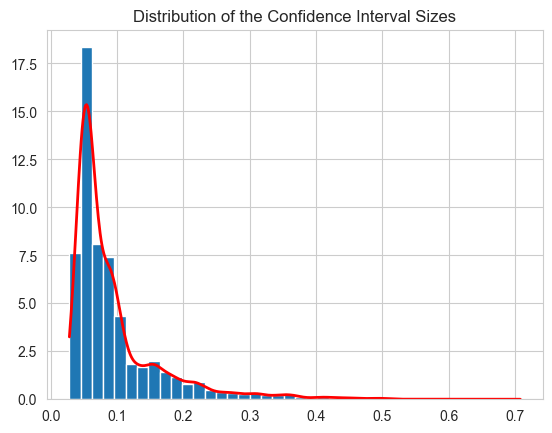

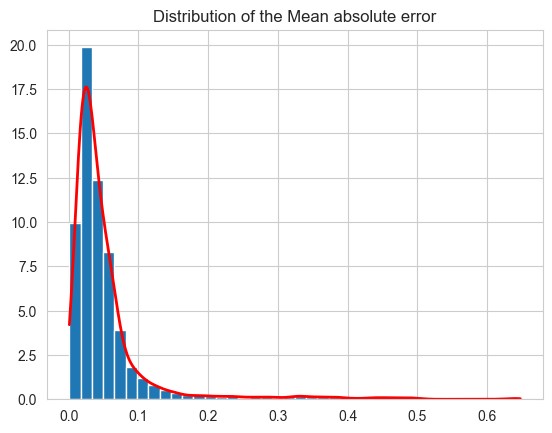

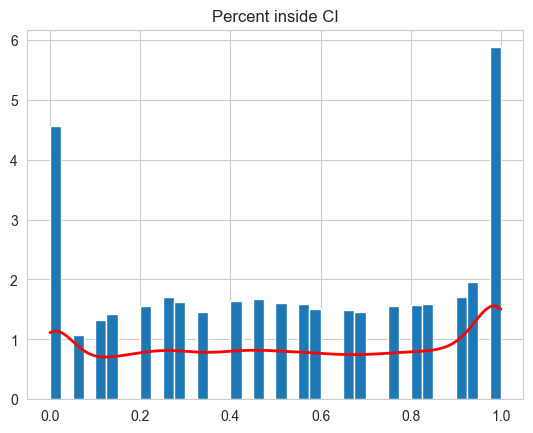

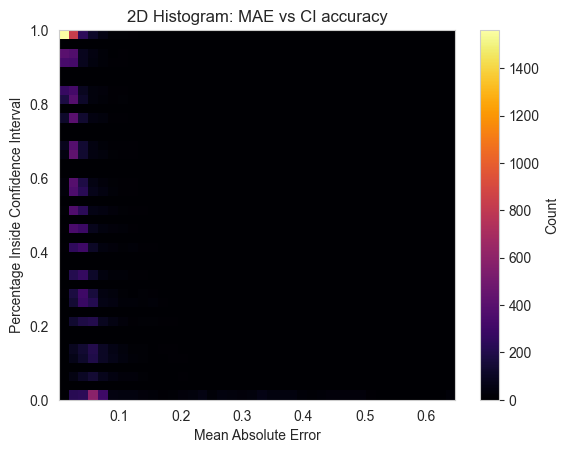

In [33]:
avg_MAE = np.average(mean_absolute_errors)
stdev_MAE = np.std(mean_absolute_errors)
avg_CI_sizes = np.average(CI_sizes)
stdev_CI_size = np.std(CI_sizes)
avg_percent_in_CI = np.average(percent_inside_CI)
stdev_perc_in_CI = np.std(percent_inside_CI)

print(avg_MAE)
print(avg_CI_sizes)
print(avg_percent_in_CI)
print(stdev_MAE)

def create_CI_plot():
    plt.hist(CI_sizes, bins=40, density=True)
    plt.title("Distribution of the Confidence Interval Sizes")
    
    kde = scipy.stats.gaussian_kde(CI_sizes)
    x_vals = np.linspace(min(CI_sizes), max(CI_sizes), 500)
    plt.plot(x_vals, kde(x_vals), 'r-', linewidth=2, label='KDE')

def create_MEA_PercentCI():
    plt.hist2d(x=mean_absolute_errors, 
           y=percent_inside_CI, 
           bins=(40,40), 
           cmap="inferno")
    plt.colorbar(label='Count')
    plt.xlabel('Mean Absolute Error')
    plt.ylabel('Percentage Inside Confidence Interval')
    plt.title('2D Histogram: MAE vs CI accuracy')
    
def create_MAE_hist():
    plt.hist(mean_absolute_errors, bins=40, density=True)
    plt.title("Distribution of the Mean absolute error")
    
    kde = scipy.stats.gaussian_kde(mean_absolute_errors)
    x_vals = np.linspace(min(mean_absolute_errors), max(mean_absolute_errors), 500)
    plt.plot(x_vals, kde(x_vals), 'r-', linewidth=2, label='KDE')

def create_percent_in_CI():
    plt.hist(percent_inside_CI, bins=40, density=True)
    plt.title("Percent inside CI")
    
    kde = scipy.stats.gaussian_kde(percent_inside_CI)
    x_vals = np.linspace(min(percent_inside_CI), max(percent_inside_CI), 500)
    plt.plot(x_vals, kde(x_vals), 'r-', linewidth=2, label='KDE')

create_CI_plot()
plt.show()

create_MAE_hist()
plt.show()

create_percent_in_CI()
plt.show()

create_MEA_PercentCI()
plt.show()

In [34]:
import os

output_dir = f"experiment2/trained{trained_on}/eval{eval_on}/aggregate_{augment_string}"
os.makedirs(output_dir, exist_ok=True)

with open(f"{output_dir}/data_summary_trained{trained_on}_eval{eval_on}.txt", "w") as f:
    f.write(mean_absolute_errors.__str__())
    f.write("\n")
    f.write("Mean absolute errors. avg:" + str(avg_MAE) + ", stdev:" + str(stdev_MAE))
    f.write("\n")
    f.write(percent_inside_CI.__str__())
    f.write("\n")
    f.write("Percentage of curve inside of confidence interval. avg:" + str(avg_percent_in_CI) + ", stdev:" + str(stdev_perc_in_CI))
    f.write("\n")
    f.write(CI_sizes.__str__())
    f.write("\n")
    f.write("Confidence interval sizes. avg:" + str(avg_CI_sizes) + ", stdev:" + str(stdev_CI_size))

create_CI_plot()
plt.savefig(f"{output_dir}/ci_sizes.png")
plt.close()

create_MAE_hist()
plt.savefig(f"{output_dir}/MAE_hist")
plt.close()

create_percent_in_CI()
plt.savefig(f"{output_dir}/PercentInCI_hist")
plt.close()

create_MEA_PercentCI()
plt.savefig(f"{output_dir}/MAE_vs_PercentInCI")
plt.close()

In [35]:
# dir = "experiment1/finalgraphs"
# 
# labels = ["SVC", "Trees", "NB", "Neighbors", "Linear", "DA", "nn", "Dummy"]
# labels2 = ["SVC", "Trees", "NB", "Neighbors", "Linear", "DA", "Network", "Dummy"]
# avges = []
# diffs = []
# avg_diffs = []
# 
# for label in labels:
#     print(label)
#     with open(f'experiment1/trained{label}/eval{label}/state1/data_summary.txt', 'r') as file:
#         # Read all lines into a list
#         lines1 = file.readlines()
#         
#     with open(f'experiment1/trained{label}/eval{label}/state8/data_summary.txt', 'r') as file:
#         # Read all lines into a list
#         lines2 = file.readlines()
#         
#     with open(f'experiment1/trained{label}/eval{label}/state42/data_summary.txt', 'r') as file:
#         # Read all lines into a list
#         lines3 = file.readlines()
#         
#     
#     avg_1 = float(lines1[1])
#     avg_2 = float(lines2[1])
#     avg_3 = float(lines3[1])
#     avges.append(avg_1)
#     avges.append(avg_2)
#     avges.append(avg_3)
#     
#     diff1 = abs(avg_1 - avg_2)
#     diff2 = abs(avg_1 - avg_3)
#     diff3 = abs(avg_2 - avg_3)
#     diffs.append(diff1)
#     diffs.append(diff2)
#     diffs.append(diff3)
#     
#     print(str(diff1) + " " + str(diff2) + " " + str(diff3))
#     
#     avg_diff = np.average([diff1,diff2,diff3])
#     avg_diffs.append(avg_diff)
#     
#     print(np.average([avg_1,avg_2,avg_3]))
#     print(avg_diff)
# 
# df = pd.DataFrame({
#     'value': diffs,
#     'group': [labels2[0], labels2[0], labels2[0],
#               labels2[1], labels2[1], labels2[1],
#               labels2[2], labels2[2], labels2[2],
#               labels2[3], labels2[3], labels2[3],
#               labels2[4], labels2[4], labels2[4],
#               labels2[5], labels2[5], labels2[5],
#               labels2[6], labels2[6], labels2[6],
#               labels2[7], labels2[7], labels2[7]],
#     'Split states': ['1 & 8', '1 & 42', '8 & 42'] * 8
# })
# 
# plot = sns.barplot(
#     data=df,
#     x='group',
#     y='value',
#     hue='Split states')
# name = "Differences between MAE of different state models evaluating own group"
# plot.set_title(name)
# plt.savefig(f"{dir}/{name}", bbox_inches="tight")
# plt.show()
# 
# sns.barplot(avges)
# plt.show()
# sns.barplot(diffs)
# plt.show()
# 
# plot = sns.barplot(y=avg_diffs, x=labels2)
# name = "Average difference between MAE of models evaluating own group"
# plot.set_title(name)
# plt.savefig(f"{dir}/{name}", bbox_inches="tight")
# plt.show()